In [5]:
import sys
sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
#sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [8]:
#import sys
sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/Modules')
sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/Viz')
datapath='/Users/chandrasekharmukherjee/Home/Centrality framework/SCRNA_benchmark/'


In [9]:
%load_ext autoreload
%autoreload 2
import importlib

from plots import *


import benchmark as bmarks
import metric as met 
import FlowRank as algo
import datasets as dsets
import simulation as simm
import embedding as embed
import newflow as newalgo
import Relative_centrality_v2 as new_score


met=importlib.reload(met)
newalgo=importlib.reload(newalgo)
algo = importlib.reload(algo)
dsets = importlib.reload(dsets)
simm = importlib.reload(simm)
embed=importlib.reload(embed)
bmarks=importlib.reload(bmarks)
new_score=importlib.reload(new_score)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

# from Custom_Func import directed_modularity, modularity, _one_level




In [11]:
import Custom_Func as Custom_Func
%load_ext autoreload
%autoreload 2
import importlib
import Custom_Func as Custom_Func
Custom_Func = importlib.reload(Custom_Func)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
#Import packages
#imports
import time
import pandas as pd
from collections import Counter
import sknetwork
import debug as debug

from sknetwork.ranking import PageRank
from sknetwork.ranking import Betweenness
from sknetwork.ranking import Closeness

import umap as umap

from numba.typed import List
import warnings
from numba import njit
import pynndescent
import numpy as np
from sklearn.cluster import SpectralClustering
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import operator
from sklearn.utils.extmath import randomized_svd
from random import randint
from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import TruncatedSVD
import scipy
from umap.umap_ import *
import math
from random import randint
import keras
from keras.datasets import mnist
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.datasets import fashion_mnist
import scanpy
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score, roc_auc_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score

import community as community_louvain
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score

from plots import *
import scipy

import igraph 
import networkx as nx

## Sample Graph

## Louvain Method with Original Q (Modularity) Function

## Louvain Method with Custom Q (Modularity) Function using Monkey Patch (Overload)

# Directed Graph

In [61]:
#Directed graph example

n_s=100
val = np.random.uniform(low=0.0, high=1.0, size=(n_s, n_s))

label=np.zeros((n_s))

for i in range(n_s//2,n_s):
    label[i]=1


G = nx.DiGraph()

for i in range(n_s):
    for j in range(n_s):

        if((i<n_s//2 and j <n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.45):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.55):
                G.add_edge(i,j,weight=1)


#G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,3),(3,6),(6,2),(2,6),(4,7),(7,5),(7,4)])
# G = nx.DiGraph()
# G.add_nodes_from([1,2,3])
# G.add_edges_from([(2,3),(1,3),(3,1)])#visualize
#nx.draw(G, with_labels=True)

## Original Directed_Modularity

In [18]:
from collections import defaultdict, deque

def get_labels(partition,n_s):
    final_partition_1 = deque(partition, maxlen=1).pop()
    #print(final_partition_1)


    label_1=np.zeros((n_s))
    c=0
    for sets in final_partition_1:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1

    return label_1

In [54]:
import debug as debug
import matplotlib.pyplot as plt

nx_comm.louvain._one_level=debug._one_level
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
from sklearn.metrics.cluster import normalized_mutual_info_score


[{65, 2, 67, 68, 6, 71, 72, 9, 10, 75, 79, 80, 81, 85, 26, 90, 91, 94, 95, 96, 41, 42, 43, 48, 52, 53, 55, 57, 62}, {1, 4, 5, 8, 11, 13, 78, 14, 16, 20, 22, 33, 35, 99, 46, 50, 63}, {64, 98, 58, 76, 77, 49, 83, 51, 87, 88, 56}, {66, 69, 70, 7, 73, 74, 15, 18, 82, 19, 21, 86, 89, 92, 93, 32, 97, 36, 37, 44, 47, 54, 59, 60, 61}, {0, 3, 12, 17, 84, 23, 24, 25, 27, 28, 29, 30, 31, 34, 38, 39, 40, 45}]
One level call
One level call
One level call


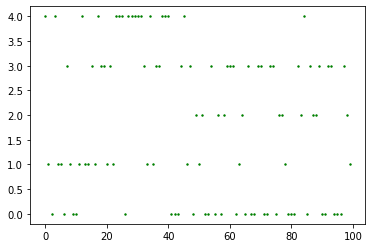

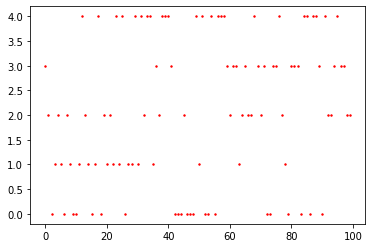

The NMI score of original Louvain compared to true label: 0.16
The NMI score of our implementation compared to true label: 0.071


In [62]:
import debug as debug
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import itertools

nx_comm.louvain._one_level=debug._one_level
og_partition = nx_comm.louvain.louvain_partitions(G, seed=0)

final_partition_1 = deque(og_partition, maxlen=1).pop()
print(final_partition_1)


label_1=np.zeros((n_s))
c=0
for sets in final_partition_1:
    for ell in sets:
        label_1[ell]=c
    
    c=c+1


nx_comm.louvain._one_level=Custom_Func._one_level
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
final_partition_2 = deque(partition, maxlen=1).pop()


label_2=np.zeros((n_s))
c=0
for sets in final_partition_2:
    for ell in sets:
        label_2[ell]=c
    c=c+1


xaxis=[i for i in range(n_s)]

plt.Figure()
plt.scatter(xaxis,label_1,s=2,color='green')
plt.show()

plt.Figure()
plt.scatter(xaxis,label_2,s=2,color='red')
plt.show()

print("The NMI score of original Louvain compared to true label:",round(NMI(label,label_1),3))
print("The NMI score of our implementation compared to true label:",round(NMI(label,label_2),3))


# # nx_quality.modularity=directed_modularity

# #Custom directed modularity
# # Q_c = 1 if nodes in community c have more than 2 inter-community edges, 0 otherwise
# # Q = sum of all Q_c for all community c

# #Set every edge weight to 1
# # for u,v in G.edges():
# #     G[u][v]['weight']=1

# #print the edge weights
# #print(G.edges(data=True))

# partition = nx_comm.louvain.louvain_partitions(G, seed=0)
# #Loop through the partition. It is a list of sets
# for i, s in enumerate(partition, start=1):
#     print(f"Set {i}: {s}")

In [ ]:
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

## Custom Directed Modularity

In [ ]:
custom_partition = Custom_Func.louvain_partitions(G, seed=0)
for i, s in enumerate(custom_partition, start=1):
    print(f"Set {i}: {s}")

In [ ]:
for i, s in enumerate(custom_partition, start=1):
    print("Set {i}: {s}")